In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [2]:
data = pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data.count().isnull()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
data.nunique()  #unique

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
data = data.drop_duplicates() 

In [8]:
data.shape

(302, 14)

<Axes: >

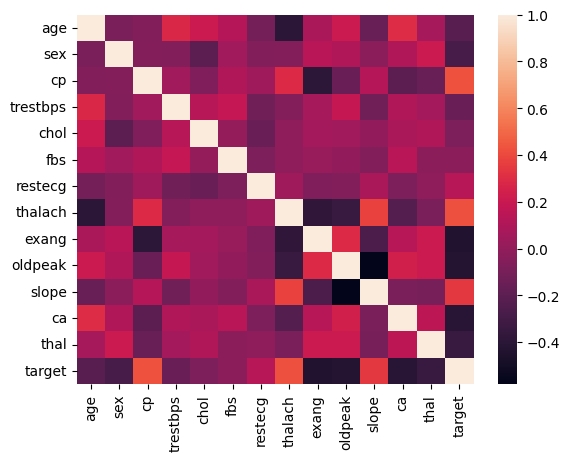

In [9]:
matrix = data.corr().round(2)  #correation matrix
sns.heatmap(matrix, annot=False) #it is a heatmap 

In [10]:
matrix #compare the value with target == > postive value means best coorelation with target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.07,-0.22
sex,-0.09,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.05,0.14,0.10,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1.00,0.05,-0.07,0.10,0.04,0.29,-0.39,-0.15,0.12,-0.20,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.15
chol,0.21,-0.20,-0.07,0.13,1.00,0.01,-0.15,-0.01,0.06,0.05,0.00,0.09,0.10,-0.08
fbs,0.12,0.05,0.10,0.18,0.01,1.00,-0.08,-0.01,0.02,0.00,-0.06,0.14,-0.03,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
thalach,-0.40,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.38,-0.23,-0.09,0.42
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1.00,0.29,-0.26,0.13,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.00,-0.06,-0.34,0.29,1.00,-0.58,0.24,0.21,-0.43


# Positive Coorelation with respect to tagert: 
1. CP = chest pain type (4 values 0,1,2,3)
1. restecg	 = resting electrocardiographic results (values 0,1,2)
1. thalach = maximum heart rate achieved
1. slope = the slope of the peak exercise ST segment

# EDA for positive coorelation with respect to Target

In [11]:
count_0 = len(data.loc[data.target == 0].value_counts()) #not heart attack -- number count
count_1 = len(data.loc[data.target == 1].value_counts()) # heart attack -- number count
print("total number of target of value equals to 0 (not heart attack): ",count_0)
print("total number of target of value equals to 1:(heart attack) ",count_1)

total number of target of value equals to 0 (not heart attack):  138
total number of target of value equals to 1:(heart attack)  164


In [12]:
df1 = data.loc[data.target == 1] #filter out the data where there is heart attack
df11 = df1['cp'].value_counts().rename_axis('cp').reset_index(name='counts').sort_values(by ='cp') #create a dataframe for bar graph
df11.cp = df11.cp.astype(str)
df11
#  the index was sorted in decending order of the count 2:69 1:41 0:39 3:16

,cp,counts
2,0,39
1,1,41
0,2,68
3,3,16


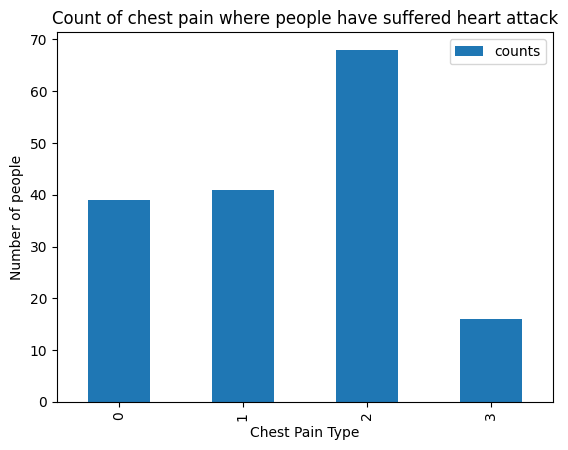

In [13]:
df11.plot(x="cp", y='counts', kind='bar')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of people')
plt.title('Count of chest pain where people have suffered heart attack')
plt.show()

# Chest Pain Type vs Target
1. Based on this we can say that, person with type 2 chest pain has more chances of getting a heart attack in future.
2. Pain 3 is the lowest. Here we are not sure what are these categorical values symbolize but based on the analysis we concluded this whole hypothesis.

In [14]:
df2 = data.loc[data.target == 1]
df22 = df2['restecg'].value_counts().rename_axis('restecg').reset_index(name='counts').sort_values(by ='restecg')
# df22.restecg = df11.restecg.astype(str)
df22
#same thing

,restecg,counts
1,0,68
0,1,95
2,2,1


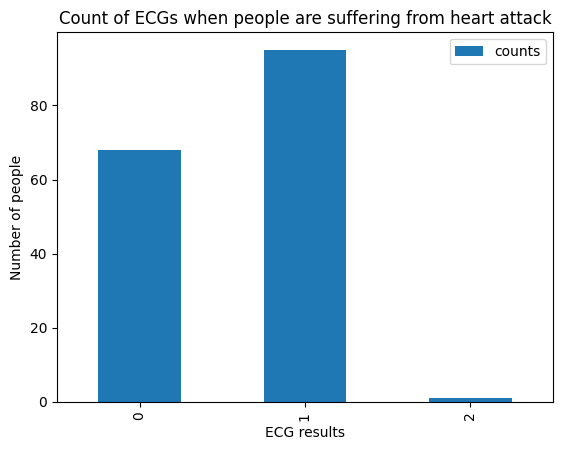

In [15]:
df22.plot(x="restecg", y='counts', kind='bar')
plt.xlabel('ECG results')
plt.ylabel('Number of people')
plt.title('Count of ECGs when people are suffering from heart attack')
plt.show()

# Resting Electro Cardiographic Results vs Target
1. ECG result - 1 is more related with Target compare to 2nd ECG result
2. ECG result - 2 provides less posibilty of having a heart attack

In [16]:
mean_over = data['thalach'].mean()
mean_over #overall mean for max- heart rate

149.56953642384107

In [17]:
df3 = data.loc[data.target == 1]  #seprating it with target ==1 and 0 which will have different means and max, min 
mean1 = df3['thalach'].mean()
maxi = df3['thalach'].max()
mini = df3['thalach'].min()

count = len(df3.loc[df3.thalach >= mean1]) # number of rates which are higher than mean (counts)
print("highest max heart rate :", maxi)
print("average max heart rate :", mean1)
print("lowest max heart rate :", mini)
print("values higher than mean :", count)

highest max heart rate : 202
average max heart rate : 158.3780487804878
lowest max heart rate : 96
values higher than mean : 92


In [18]:
df13 = data.loc[data.target == 0] #same way for non heart attack or traget==0
mean = df13['thalach'].mean()
maxi = df13['thalach'].max()
mini = df13['thalach'].min()
count = len(df13.loc[df13.thalach >= mean1])
print("highest max heart rate :", maxi)
print("average max heart rate :", mean)
print("lowest max heart rate :", mini)
print("values higher than mean :", count)
#now here i want to create a scatterplot for comparision but unfortunaelty I couldn't rn! code error

highest max heart rate : 195
average max heart rate : 139.1014492753623
lowest max heart rate : 71
values higher than mean : 30


In [19]:
df4 = data.loc[data.target == 1]
df44 = df4['slope'].value_counts().rename_axis('slope').reset_index(name='counts').sort_values(by ='slope')
df44

,slope,counts
2,0,9
1,1,49
0,2,106


In [20]:
df14 = data.loc[data.target == 0]
df144 = df14['slope'].value_counts().rename_axis('slope').reset_index(name='counts').sort_values(by ='slope')
df144

,slope,counts
2,0,12
0,1,91
1,2,35


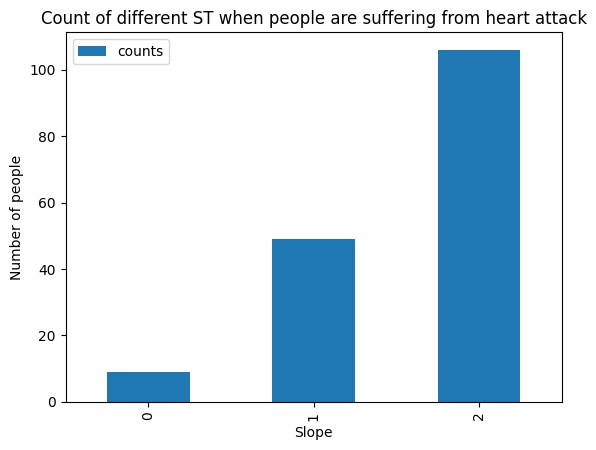

In [21]:
df44.plot(x="slope", y='counts', kind='bar') #value 2 is the risk of heart attack
plt.xlabel('Slope')
plt.ylabel('Number of people')
plt.title('Count of different ST when people are suffering from heart attack')
plt.show()

# count 2 is dangerous so  we are actually calculating that if a person is having a heart attack what is the value of slope
# the count on value 2 is maximum which we can say that value 2 is the reason / symptom of heart attack 

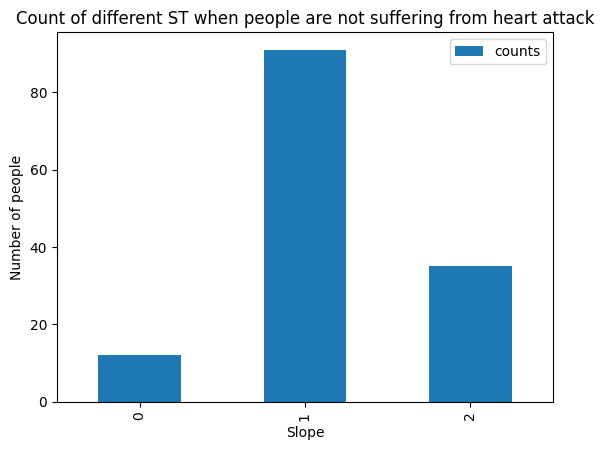

In [22]:
df144.plot(x="slope", y='counts', kind='bar') #value 1 is the normal condition for any person 
plt.xlabel('Slope')
plt.ylabel('Number of people')
plt.title('Count of different ST when people are not suffering from heart attack')
plt.show()

# Slope of ST segement vs Target

The slope of the peak exercise ST segment is an important parameter in assessing heart health. Let me break it down for you:

1. **Upsloping (Value 0):** This indicates a better heart rate response during exercise. It’s considered typical for a healthy heart. The ST segment slopes sharply upwards.
2. **Flat (Value 1):** A flat ST segment suggests minimal change during exercise. While not alarming, it’s worth monitoring.
3. **Downsloping (Value 2):** People with a downsloping ST segment (signs of an unhealthy heart) are more likely to have heart disease. This pattern indicates potential issues and requires attention

In [23]:
data1 = data.loc[data.target == 0]
data2 = data.loc[data.target == 1]
x1 = data1['thalach'].to_frame()
y1 = data1['thalach'].to_frame()
x2 = data2['thalach'].to_frame()
y2 = data2['thalach'].to_frame()

In [24]:
x_full = data1.thalach
x1_full = data2.thalach
y_full = data1.target
y1_full = data2.target

Text(0, 0.5, 'Y-axis')

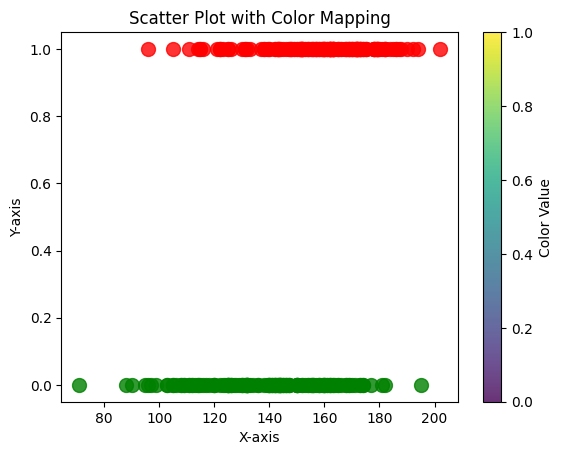

In [25]:
plt.scatter(x_full, y_full, c='g', s=100, alpha=0.8)
plt.scatter(x1_full, y1_full, c='r', s=100, alpha=0.8)
 
# Add color bar for reference
cbar = plt.colorbar()
cbar.set_label('Color Value')
 
# Set plot title and labels
plt.title('Scatter Plot with Color Mapping')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [26]:
x1

,thalach
165,108
166,129
167,160
168,147
169,155
...,...
298,123
299,132
300,141
301,115


Text(0, 0.5, 'Y-axis')

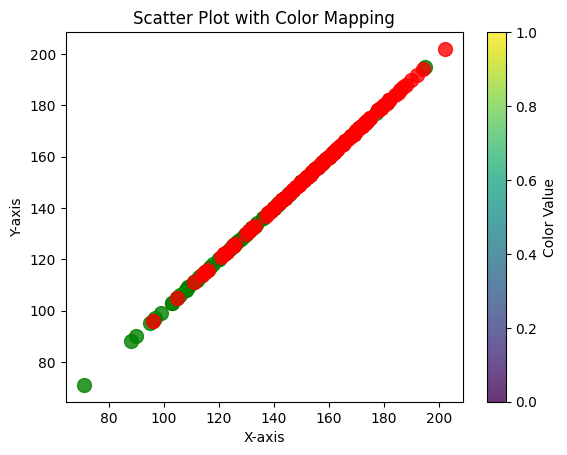

In [27]:
# Create a scatter plot with color mapping
plt.scatter(x1, y1, c='g', s=100, alpha=0.8)
plt.scatter(x2, y2, c='r', s=100, alpha=0.8)
 
# Add color bar for reference
cbar = plt.colorbar()
cbar.set_label('Color Value')
 
# Set plot title and labels
plt.title('Scatter Plot with Color Mapping')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [28]:
#df00 = pd.merge(data1, data2, on='thalach', how='left')
df00 = data1[~data1.thalach.isin(data2.thalach)]
df01 = data2[~data2.thalach.isin(data1.thalach)]
x11 = df00['thalach']
y11 = df00['target']
x12 = df01['thalach']
y12 = df01['target']

Text(0, 0.5, 'Y-axis')

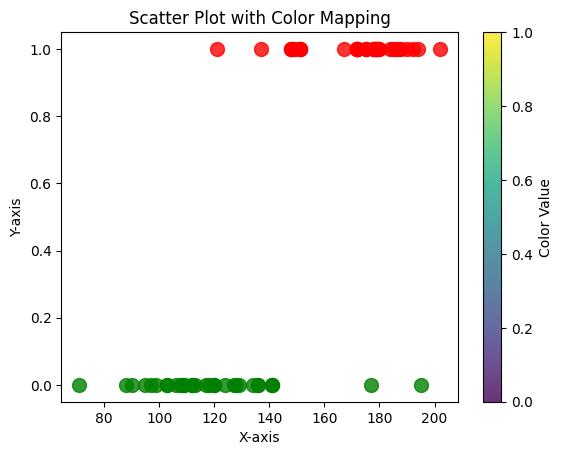

In [29]:
# Create a scatter plot with color mapping
plt.scatter(x11, y11, c='g', s=100, alpha=0.8)
plt.scatter(x12, y12, c='r', s=100, alpha=0.8)
 
# Add color bar for reference
cbar = plt.colorbar()
cbar.set_label('Color Value')
 
# Set plot title and labels
plt.title('Scatter Plot with Color Mapping')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [30]:
dem0 = x11.loc[x11>150]
dem1 = x12.loc[x12<150]

In [31]:
dem0

200    177
248    195
Name: thalach, dtype: int64

In [32]:
dem1

5      148
23     137
38     148
42     148
50     149
129    121
146    149
Name: thalach, dtype: int64

In [33]:
med1 = x11.median()
med2 = x12.median()
mean1 = x11.mean()
mean2 = x12.mean()
print("median for target == 0:", med1)
print("median for target == 1:", med2)
print("mean for target == 0:", mean1)
print("mean for target == 1:", mean2)

median for target == 0: 117.0
median for target == 1: 176.5
mean for target == 0: 119.0
mean for target == 1: 171.3409090909091


# Model Training and Pre Processing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [35]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
df_train, df_test = train_test_split(data, test_size=0.20, random_state = 20)
train_X = data.drop("target", axis=1)
train_y = data.target
val_X = df_test
val_y = df_test.pop('target')

In [37]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()
reg_model.fit(train_X,train_y)
pred = reg_model.predict(val_X)
#print(mean_absolute_error(train_y,pred))
print("Linear Regression Model Training Score: ", reg_model.score(train_X, train_y))
accuracy= accuracy_score(val_y,pred)
print ("Logistic testing accuracy is ", round(accuracy,2) * 100, "%")

Linear Regression Model Training Score:  0.8609271523178808
Logistic testing accuracy is  90.0 %


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier( iterations=10)

clf.fit(train_X, train_y,eval_set=(val_X, val_y))
pred = clf.predict(train_X)
print(mean_absolute_error(train_y,pred))
print("CatBoost Model Training Score: ", clf.score(train_X, train_y))

Learning rate set to 0.174772
0:	learn: 0.6374848	test: 0.6314685	best: 0.6314685 (0)	total: 54.1ms	remaining: 486ms
1:	learn: 0.5942067	test: 0.5812287	best: 0.5812287 (1)	total: 54.7ms	remaining: 219ms
2:	learn: 0.5600233	test: 0.5368104	best: 0.5368104 (2)	total: 55.3ms	remaining: 129ms
3:	learn: 0.5298111	test: 0.5009951	best: 0.5009951 (3)	total: 55.9ms	remaining: 83.8ms
4:	learn: 0.5024577	test: 0.4708312	best: 0.4708312 (4)	total: 56.5ms	remaining: 56.5ms
5:	learn: 0.4789970	test: 0.4431494	best: 0.4431494 (5)	total: 57.1ms	remaining: 38.1ms
6:	learn: 0.4575063	test: 0.4158503	best: 0.4158503 (6)	total: 57.7ms	remaining: 24.7ms
7:	learn: 0.4430358	test: 0.4009265	best: 0.4009265 (7)	total: 58.2ms	remaining: 14.5ms
8:	learn: 0.4310024	test: 0.3881278	best: 0.3881278 (8)	total: 58.7ms	remaining: 6.53ms
9:	learn: 0.4171768	test: 0.3728349	best: 0.3728349 (9)	total: 59.3ms	remaining: 0us

bestTest = 0.3728349194
bestIteration = 9

0.10927152317880795
CatBoost Model Training Score:  

In [39]:
# import xgboost as xgb
# regressor=xgb.XGBRegressor()

# regressor.fit(train_X, train_y)
# pred = regressor.predict(train_X)
# print(mean_absolute_error(train_y,pred))
# print("XGBoost Model Training Score: ", regressor.score(train_X, train_y))

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(max_depth=3, random_state=0)
dtr.fit(train_X,train_y)
pred = dtr.predict(train_X)
print(mean_absolute_error(train_y,pred))
print("Decision Tree Classifier Model Training Score: ", dtr.score(train_X,train_y))


0.15562913907284767
Decision Tree Classifier Model Training Score:  0.8443708609271523
